In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Таблица_2021-02-22_23-43.csv to Таблица_2021-02-22_23-43.csv


In [ ]:
import pandas as pd
import io

covid_df = pd.read_csv(io.StringIO(uploaded['Таблица_2021-02-22_23-43.csv'].decode('utf-8')), sep = ';')
covid_df.head(5)

,Дата,Регион,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
0,27.12.2020,Еврейская АО,3680,2662,68,1,16,33
1,23.09.2020,Брянская обл.,9117,7387,37,0,39,34
2,26.09.2020,Костромская обл.,4553,3329,67,5,54,44
3,25.10.2020,Нижегородская обл.,39260,33221,711,11,396,224
4,20.09.2020,Томская обл.,6775,5554,79,1,62,92


In [ ]:
covid_df = covid_df.rename(columns = {'Дата': 'Date', 'Регион': 'Region', 'Заражений': 'Cum_confirmed', 'Выздоровлений': 'Cum_recovered',
                                     'Смертей': 'Cum_dead', 'Смертей за день': 'Deaths', 
                                      'Заражений за день': 'Confirmed', 'Выздоровлений за день': 'Recovered'}, inplace = False)

covid_df = covid_df[covid_df.Region.str.contains('Москва',case=False)]
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format = '%d.%m.%Y')
covid_df = covid_df.sort_values(by='Date')
#covid_df['Date'] = covid_df['Date'].dt.strftime('%m/%d/%y')
#covid_df.set_index('Date', inplace=True)
covid_df.head(5)

,Date,Region,Cum_confirmed,Cum_recovered,Cum_dead,Deaths,Confirmed,Recovered
24913,2020-03-12,Москва,21,0,0,0,21,0
13722,2020-03-13,Москва,26,0,0,0,5,0
2525,2020-03-14,Москва,35,0,0,0,9,0
13245,2020-03-15,Москва,35,1,0,0,0,1
2033,2020-03-16,Москва,53,1,0,0,18,0


In [ ]:
dataset = covid_df['Cum_confirmed'][:61]

# Fit

0.05161849988171613
0.22719705077688868
0.9328645505115463


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


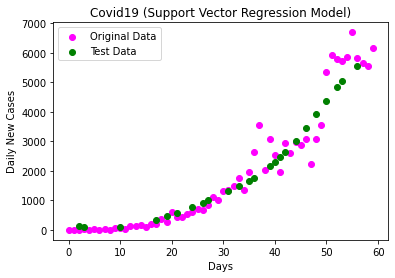

In [ ]:
#Import libraries

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# create feauture and label column

X = np.arange(60)
X = X.reshape(-1,1)

y = dataset.values.astype(float)

# create the daily number of cases series

y = np.diff(y)
y = y.reshape(-1,1)

# create train and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=1)

#scaling the datest by standardization technique

from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.transform(x_test)
y_train = scy.fit_transform(y_train)
y_test = scy.transform(y_test)

#Fit the SVR model

from sklearn.svm import SVR
regressor = SVR(kernel='rbf', epsilon=0.1,)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

# Caluclate the model performance parameters

mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)
print(regressor.score(x_test,y_test))

y_pred = np.array(scy.inverse_transform(y_pred))
y_pred = y_pred.reshape(-1,1)
x_test = np.array(scx.inverse_transform(x_test))

#plot the regression fit with original data

plt.scatter(X, y, color = 'magenta', label = 'Original Data')
plt.scatter(x_test, y_pred, color = 'green', label = 'Test Data')
plt.title('Covid19 (Support Vector Regression Model)')
plt.xlabel('Days')
plt.ylabel('Daily New Cases')
plt.legend()
plt.show()

In [ ]:
#Predict the future values by entering number of days since onset  
prediction = []
for i in range(62, 122):
  y_pred = scy.inverse_transform(regressor.predict(scx.transform([[i]])))
  prediction.append(y_pred)

# untitled1.py

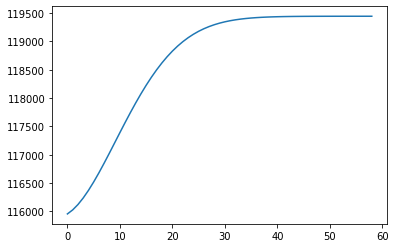

In [ ]:
#import libraries

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 

X = np.concatenate(prediction, axis=0)

X = np.diff(X)
X = X.reshape(-1,1)
X = abs(X)
Xnew = np.cumsum(X)
Xnew= Xnew.reshape(-1,1)
M = 115909 # Enter Max value from the past cumulative dataset
Xnew = Xnew + M # Create cumulative scaled predicted series
plt.plot(Xnew)

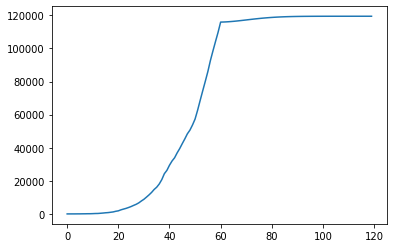

In [ ]:
y = dataset.values
Xnew = Xnew.ravel()
new = np.concatenate([y, Xnew])
plt.plot(new)